<a href="https://colab.research.google.com/github/StellaIbeh/Diabetes_Prediction_Mode-/blob/main/ML_Pipeline_Diabetes_Prediction_Summative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from src.preprocessing import preprocess_data
from src.model import train_model


from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold, cross_validate






ModuleNotFoundError: No module named 'src'

In [10]:
# Saving my model in Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:

path = "/content/drive/MyDrive/diabetes.csv"




In [12]:
def load_data(path):
  return pd.read_csv(path)

In [13]:
df = load_data(path)
pd.set_option('display.max_columns', 1000)

df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.shape

(768, 9)

In [15]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
# for cleaniness in further plots, all float types are converted to int
df = df.astype(int)
# Assuming 'Outcome' is the column you're interested in, replace 'Outcome' with the actual column name
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [17]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0              6      148             72             35        0   33   
1              1       85             66             29        0   26   
2              8      183             64              0        0   23   
3              1       89             66             23       94   28   
4              0      137             40             35      168   43   
..           ...      ...            ...            ...      ...  ...   
763           10      101             76             48      180   32   
764            2      122             70             27        0   36   
765            5      121             72             23      112   26   
766            1      126             60              0        0   30   
767            1       93             70             31        0   30   

     DiabetesPedigreeFunction  Age  Outcome  
0                           0   50        1  
1                           0   31        0  
2                           0   32        1  
3                           0   21        0  
4                           2   33        1  
..                        ...  ...      ...  
763                         0   63        0  
764                         0   27        0  
765                         0   30        0  
766                         0   47        1  
767                         0   23        0  

[768 rows x 9 columns]>

In [18]:

# define a function to simplify the plots in further sections
def ida_plot(li_col, row, col=3, figsize=(20, 5), palette="Set2"):

    """
    This function return plt subplots by
    looping through the df columns
    display only the desired columns
    """
       # prepare subplot format
    fig, ax = plt.subplots(row, col, figsize=figsize)
    axe = ax.ravel()

    # Define a color palette for the bar charts
    colors = sns.color_palette("Set2", len(li_col))

    # use for loop to plot
    for i in range(len(li_col)):

        # create bar charts for each column
        sns.countplot(x=df[li_col[i]], ax=axe[i], palette=palette)

    # adjust the spacing of the subplots
    plt.subplots_adjust(
        wspace=0.5,
        hspace=0.5
    )

<ipython-input-19-e5a09eaa4085>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Outcome', palette="Set2")


<Axes: xlabel='Outcome', ylabel='count'>

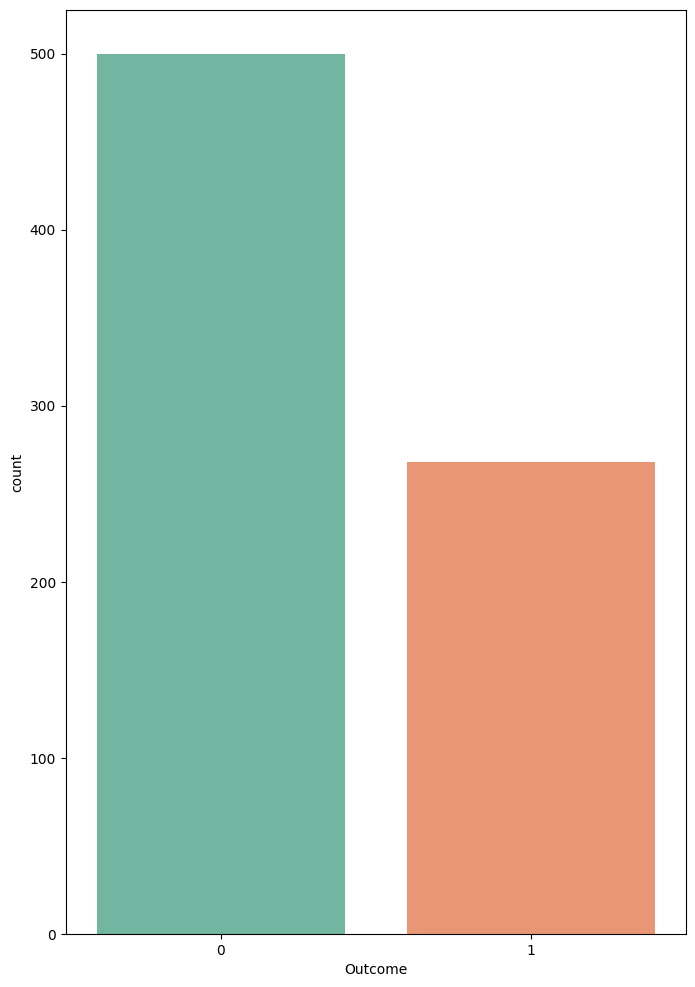

In [19]:

# plot classes
fig, ax = plt.subplots(figsize=(8, 12))
sns.countplot(data=df, x='Outcome', palette="Set2")

In [20]:
#Describe the plot
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.548177,0.071615,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.860602,0.277494,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.000000,0.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.000000,0.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.000000,2.000000,81.000000,1.000000


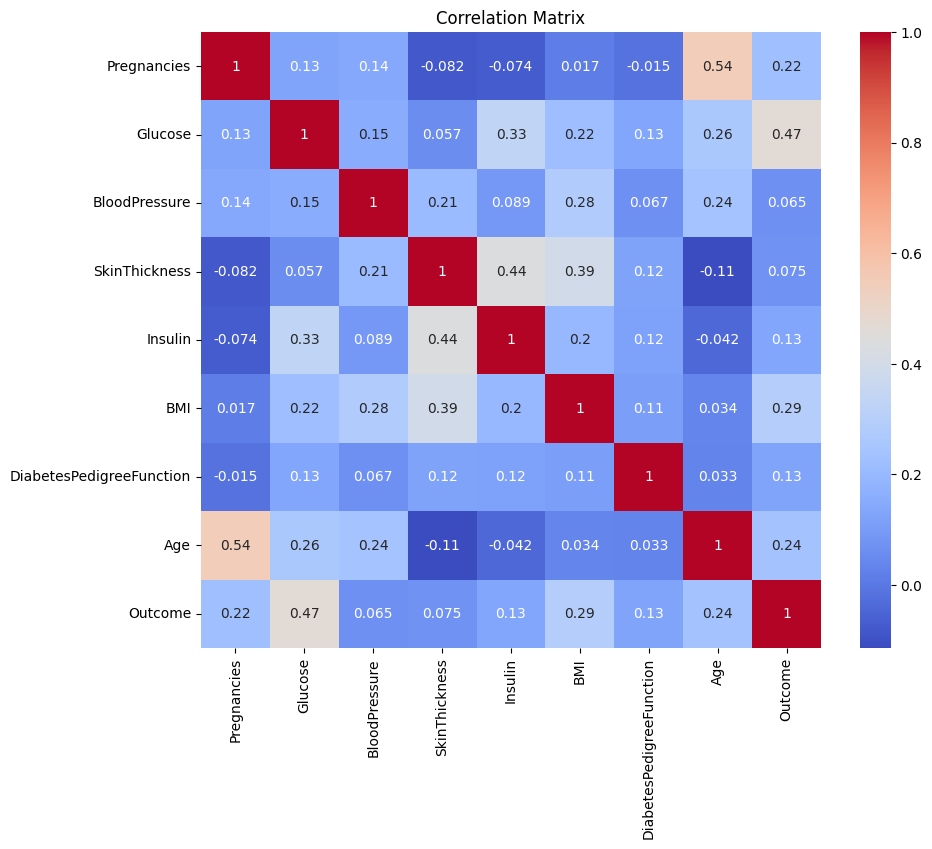

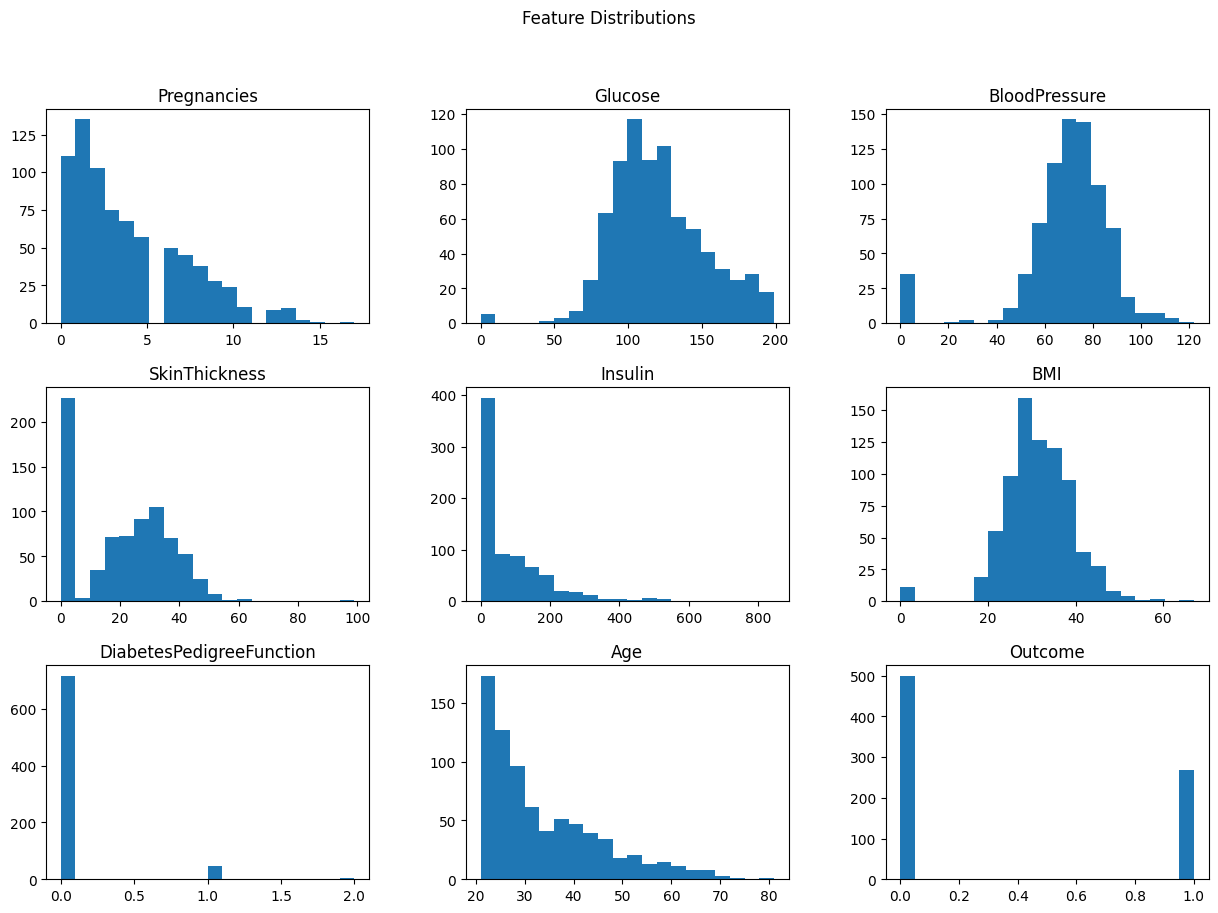

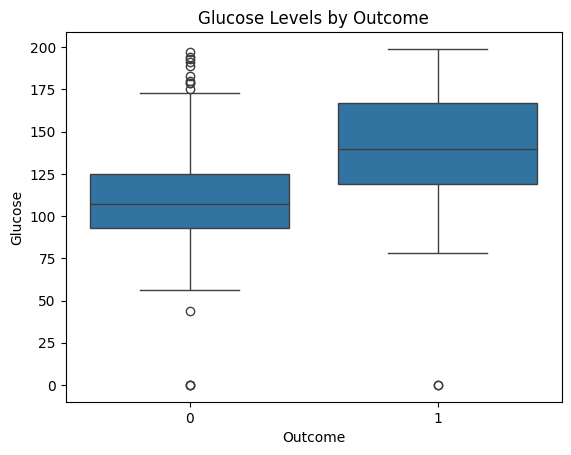

In [23]:
# Visualize correlations between features
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame, replace 'data' with 'df'
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Changed 'data' to 'df'
plt.title('Correlation Matrix')
plt.show()

# Visualize distribution of each feature
df.hist(bins=20, figsize=(15, 10), grid=False)  # Changed 'data' to 'df'
plt.suptitle('Feature Distributions')
plt.show()

# Compare glucose levels based on Outcome
sns.boxplot(x='Outcome', y='Glucose', data=df)  # Changed 'data' to 'df'
plt.title('Glucose Levels by Outcome')
plt.show()

Data Preprocessing


In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def preprocess_data(data):
    # Handle missing values
    data = data.fillna(method='ffill')

    # Encode categorical variables (if any)
    data = pd.get_dummies(data, drop_first=True)

    # Scale numerical features
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    return data_scaled


Model.py